### Examen 3

###### Daniel Alconchel Vázquez

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline 
from random import random 
sp.init_printing()
import math
import timeit


t, x, z = sp.symbols('t, x, z')
h = sp.symbols('h')
y0 = sp.symbols('y_0')

Nos dan el siguiente problema de valor inicial:
$$y'(t)=\frac{t-y(t)}{2}, \quad t\in[0,1]$$
$$y(0)=1$$

In [3]:
def f(t,z):
    return (t-z)/2

# Valores del intervalo
a = 0; b = 1;
# Condición Inicial del PVI
y_a = 1

Vamos a comenzar hallando la solución exacta. Para ello:

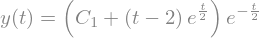

In [5]:
y = sp.Function('y')
edo = y(t).diff(t)-f(t,y(t))
sp.Eq(edo,0)
edo_sol = sp.dsolve(edo)
edo_sol

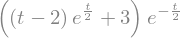

In [8]:
ics = {y(0):y0}
edo_sol.rhs.subs(t, 0),edo_sol.lhs.subs(t, 0).subs(ics)
CI_eq = sp.Eq(edo_sol.lhs.subs(t, 0).subs(ics),edo_sol.rhs.subs(t, 0))
CI_sol = sp.solve(CI_eq) 
edo_sol.subs(CI_sol[0]) 
sol_exacta = edo_sol.rhs.subs(CI_sol[0]).subs({y0:y_a})
sol_exacta

Una vez que tenemos la solución exacta, vamos a proceder a calcular la solución con el método de Euler mejorado(punto medio) y Euler modificado(Heun). Para ello, comenzamos definiendo dichos métodos:

In [14]:
'''EULER MEJORADO'''
def euler_mejorado(F,a,b,x0,h):
    N = int((b-a)/h)
    tn =[]
    xn = []
    tn.append(a)
    xn.append(x0)
    
    for i in range(1,N+1):
        tn.append(a+i*h)
        xn.append(0)
    for i in range(N):
        xn[i+1] = xn[i] + h*F(tn[i]+h/2,xn[i]+(h/2)*F(tn[i],xn[i]))

    valores_exactos = np.array([sol_exacta.subs({t:tn[n]}) for n in range(len(xn))])
    diferencias = []
    for i in range (N+1):
        diferencias.append(abs(valores_exactos[i]-xn[i]))
        
    return tn,xn,diferencias

In [17]:
'''EULER MODIFICADO'''
def euler_modificado(F,a,b,x0,h):
    N = int((b-a)/h)
    tn =[]
    xn = []
    tn.append(a)
    xn.append(x0)
    
    for i in range(1,N+1):
        tn.append(a+i*h)
        xn.append(0)    
    for i in range(N):
        xn[i+1] = xn[i] + (h/2)*(F(tn[i],xn[i])+F(tn[i+1],xn[i]+h*F(tn[i],xn[i])))
    
    valores_exactos = np.array([sol_exacta.subs({t:tn[n]}) for n in range(len(xn))])
    diferencias = []
    for i in range (N+1):
        diferencias.append(abs(valores_exactos[i]-xn[i]))
        
    return tn,xn,diferencias

En vez de continuar en orden con el ejercicio, voy a pasar a definir el método de Runge-Kutta, que nos piden en un apartado posterior del enunciado. Para ello, usaremos la siguiente implementación:

In [23]:
'''RUNGE-KUTTA 2 ORDEN'''
def runge_kutta_2(F,alpha,beta,a,b,x0,h):
    N = int((b-a)/h)
    tn =[]
    xn = []
    tn.append(a)
    xn.append(x0)

    for i in range(1,N+1):
        tn.append(a+i*h)
        xn.append(0)
    for i in range(N):
        K1 = F(tn[i],xn[i])
        K2 = F(tn[i]+beta*h, xn[i]+h*beta*K1)

        xn[i+1] = xn[i] + h*((1-alpha)*K1 + alpha*K2)

    valores_exactos = np.array([sol_exacta.subs({t:tn[n]}) for n in range(len(xn))])
    diferencias = []
    for i in range (N+1):
        diferencias.append(abs(valores_exactos[i]-xn[i]))
        
    return tn,xn,diferencias

Una vez definidos estos tres métodos, se nos pide realizar los cálculos de las correspondientes aproximaciones numéricas, usando $h=0.1$.

In [24]:
a = 0
b = 1
x0 = 1
h = 0.1
tnPtoMedio, xnPtoMedio, difPtoMedio = euler_mejorado(f,a,b,x0,h)

In [25]:
a = 0
b = 1
x0 = 1
h = 0.1
tnHeun, xnHeun, difHeun = euler_modificado(f,a,b,x0,h)

In [29]:
# alpha=3/4 y beta=2/3
a = 0
b = 1
x0 = 1
h = 0.1
tnRK, xnRK, difRK = runge_kutta_2(f,3/4,2/3,a,b,x0,h)

Una vez obtenidas las aproximaciones, podemos discernir numéricamente cuál de los tres métodos es mejor en cada caso. Para ello, calculamos el máximo de sus errores absolutos en los nodos de las particiones que hemos usado previamente:

In [30]:
N = int((b-a)/h)
for i in range (N+1):
    difPtoMedio[i] = float(difPtoMedio[i])
    difHeun[i] = float(difHeun[i])
    difRK[i] = float(difRK[i])
for i in range(N+1):
    print(difPtoMedio[i],"\t",difHeun[i],"\t",difRK[i])

0.0 	 0.0 	 0.0
6.172649785796125e-05 	 6.172649785796125e-05 	 6.172649785796125e-05
0.00011743339212144654 	 0.00011743339212144654 	 0.00011743339212144654
0.0001675609592013405 	 0.0001675609592013405 	 0.0001675609592013405
0.00021252085150380573 	 0.00021252085150380573 	 0.00021252085150380573
0.0002526978420688275 	 0.0002526978420688275 	 0.0002526978420688275
0.00028845146713607495 	 0.00028845146713607495 	 0.00028845146713607495
0.000320117572425338 	 0.000320117572425227 	 0.000320117572425338
0.000348009768630142 	 0.00034800976863003097 	 0.000348009768630142
0.0003724208012952923 	 0.0003724208012951813 	 0.0003724208012952923
0.00039362383996743855 	 0.0003936238399673275 	 0.00039362383996743855


In [31]:
print("Max Pto Medio:")
print(np.amax(difPtoMedio))

print("\nMax Heun:")
print(np.amax(difHeun))

print("\nMax Runge Kutta:")
print(np.amax(difRK))

Max Pto Medio:
0.00039362383996743855

Max Heun:
0.0003936238399673275

Max Runge Kutta:
0.00039362383996743855


Como vemos, al ser todos los métodos del mismo orden, la diferencia entre el máximo de sus errores absolutos es mínima, por lo que, en este caso, cualquiera de los 3 métodos es bueno.